# Waze Partner Feed Data Analysis

#### Waze partner user data password: DBL0XHWBRYP31I5F

#### Mapeamento de bases de dados - Alagamento
1. https://docs.google.com/document/d/199HegnqjD61N-vFcFRgXXH5TqySaJIrRT0E7Phr3Rys/edit#heading=h.ino7uuzi9no9

#### Additional data sources
1. API:
    1. https://il-georss.waze.com/rtserver/web/TGeoRSS?tk=ccp_partner&format=JSON&types=traffic,alerts,irregularities&polygon=
1. Waze Partner:
    1. 'https://www.waze.com/partnerhub-api/waze-feed-access-token/c37c11ba-ff9d-4ad5-8ecc-4e4f12e91efb?format=1'
1. Bigquery path:
    1. waze-public-dataset.partner_EscritriodeDadosdoRiodeJaneiro.view_alerts_clustered

In [2]:
import requests, json, os
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from datetime import datetime

C:\Users\luisr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Waze partner feed request

In [3]:
waze_url = 'https://www.waze.com/partnerhub-api/waze-feed-access-token/c37c11ba-ff9d-4ad5-8ecc-4e4f12e91efb?format=1'

incidents = requests.get(waze_url).json()
keys = list(incidents.keys())

alerts = pd.DataFrame(incidents[keys[0]])
jams = pd.DataFrame(incidents[keys[-1]])

# Data cleaning & preprocessing
for df in [alerts, jams]:    
    df['pubMillis'] = (df['pubMillis'] / 1000).map(datetime.fromtimestamp)
    df.sort_values('pubMillis', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)

### Latest feed alerts

In [4]:
alerts[['type', 'subtype', 'confidence', 'reliability', 'street', 'location', 'pubMillis']]

,type,subtype,confidence,reliability,street,location,pubMillis
0,WEATHERHAZARD,HAZARD_ON_ROAD_POT_HOLE,0,5,Av. das Américas - Pista Central,"{'x': -43.332217, 'y': -23.00093}",2022-10-06 12:01:00
1,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,0,5,Av. Brasil - Pista Central,"{'x': -43.461508, 'y': -22.859116}",2022-10-06 12:00:59
2,JAM,JAM_STAND_STILL_TRAFFIC,0,5,R. Voluntários da Pátria,"{'x': -43.198264, 'y': -22.956426}",2022-10-06 12:00:57
3,JAM,JAM_MODERATE_TRAFFIC,0,5,Av. Francisco Bicalho - Pista Central,"{'x': -43.209189, 'y': -22.90979}",2022-10-06 12:00:56
4,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,0,5,R. Cel. Cabrita,"{'x': -43.22778, 'y': -22.898159}",2022-10-06 12:00:51
...,...,...,...,...,...,...,...
621,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,NaN,"{'x': -43.207042, 'y': -22.910151}",2022-06-17 17:00:50
622,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,R. Marquês de Sapucaí,"{'x': -43.197893, 'y': -22.907648}",2022-06-14 13:07:49
623,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,NaN,"{'x': -43.36483, 'y': -22.837585}",2022-05-14 11:08:23
624,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,NaN,"{'x': -43.330305, 'y': -23.007484}",2022-02-02 20:14:45


### Lattest feed jams (traffic)

In [10]:
jams[['level', 'speedKMH', 'length', 'line', 'endNode', 'roadType', 'delay', 'street', 'pubMillis']]

,level,speedKMH,length,line,endNode,roadType,delay,street,pubMillis
0,3,4.98,179,"[{'x': -43.314734, 'y': -23.008184}, {'x': -43...",R. Gen. Ivan Raposo,1,107,Av. Alda Garrido,2022-10-06 12:00:39.952
1,3,4.80,241,"[{'x': -43.229741, 'y': -22.974769}, {'x': -43...",NaN,1,120,R. dos Oitis,2022-10-06 12:00:39.886
2,1,3.94,185,"[{'x': -43.289822, 'y': -22.82634}, {'x': -43....",NaN,1,153,R. Abaíra,2022-10-06 12:00:39.329
3,4,4.67,293,"[{'x': -43.215433, 'y': -22.903574}, {'x': -43...",Pç. Pedro II,2,193,Av. Pedro II,2022-10-06 12:00:39.268
4,2,6.79,244,"[{'x': -43.28094, 'y': -22.906972}, {'x': -43....",R. Lins de Vasconcelos,1,68,R. Azamor,2022-10-06 12:00:39.029
...,...,...,...,...,...,...,...,...,...
572,5,0.00,15,"[{'x': -43.217523, 'y': -22.972236}, {'x': -43...",NaN,2,-1,Av. Borges de Medeiros,2022-09-01 10:39:14.443
573,5,0.00,168,"[{'x': -43.20844, 'y': -22.900073}, {'x': -43....",Av. Francisco Bicalho,2,-1,NaN,2022-08-31 22:01:24.976
574,5,0.00,202,"[{'x': -43.36483, 'y': -22.837585}, {'x': -43....",Est. João Paulo,2,-1,NaN,2022-08-19 10:32:18.940
575,5,0.00,107,"[{'x': -43.344944, 'y': -22.805179}, {'x': -43...",BR-116 N Rod. Pres. Dutra,4,-1,NaN,2022-08-16 03:10:54.006


---
# Exploratory Data Analysis

### Number of alerts

In [6]:
alerts.shape

(626, 15)

### Date time range

In [7]:
alerts['pubMillis'].min(), alerts['pubMillis'].max()

(Timestamp('2022-01-04 08:51:09'), Timestamp('2022-10-06 12:01:00'))

### Alert types

WEATHERHAZARD    422
JAM              160
ROAD_CLOSED       34
ACCIDENT          10
Name: type, dtype: int64

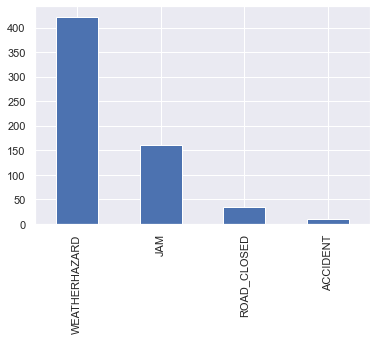

In [8]:
display(alerts['type'].value_counts())
ax = alerts['type'].value_counts().plot.bar()

### Alert Subtypes

HAZARD_ON_ROAD_POT_HOLE               246
JAM_STAND_STILL_TRAFFIC                88
HAZARD_ON_ROAD_CONSTRUCTION            82
JAM_HEAVY_TRAFFIC                      51
ROAD_CLOSED_EVENT                      34
HAZARD_ON_SHOULDER                     28
HAZARD_ON_ROAD_CAR_STOPPED             27
HAZARD_ON_SHOULDER_CAR_STOPPED         18
JAM_MODERATE_TRAFFIC                   14
                                       13
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT      9
HAZARD_ON_ROAD_OBJECT                   4
ACCIDENT_MINOR                          4
HAZARD_ON_SHOULDER_MISSING_SIGN         3
HAZARD_ON_SHOULDER_ANIMALS              2
ACCIDENT_MAJOR                          2
HAZARD_ON_ROAD_ROAD_KILL                1
Name: subtype, dtype: int64

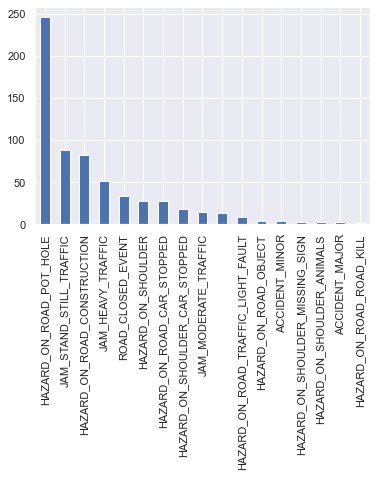

In [9]:
display(alerts['subtype'].value_counts())
ax = alerts['subtype'].value_counts().plot.bar()